# 使用隨機森林進行預測

In [75]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 載入iris資料集

In [29]:
from sklearn.datasets import load_iris

In [30]:
iris = load_iris()

In [31]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [32]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [33]:
X = iris.data
Y = iris.target

In [34]:
len(X)

150

In [35]:
X[0]

array([5.1, 3.5, 1.4, 0.2])

In [36]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [37]:
X = X[:,2:]

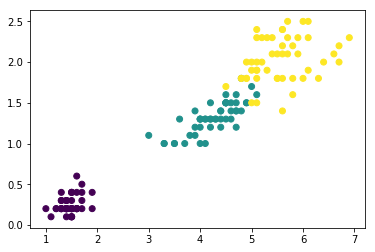

In [38]:
plt.scatter(X[:,0], X[:,1], c=Y)

## 產生訓練集跟測試集，一半訓練，一半測試

In [88]:
from sklearn.model_selection import train_test_split

In [105]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=9487)

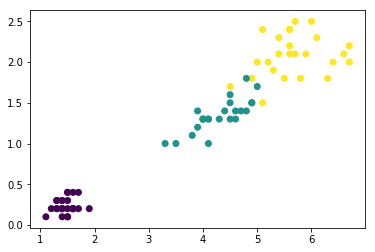

In [106]:
plt.scatter(x_train[:,0], x_train[:,1], c=y_train)

## 使用ramdomForest來做分類，來跟SVM比一比

In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
svm=SVC()
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)

In [109]:
rf.fit(x_train, y_train)
svm.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## 計算準確度

In [110]:
from sklearn.metrics import accuracy_score
rf_predicted = rf.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_predicted)

svm_predicted = svm.predict(x_test)
svm_accuracy = accuracy_score(y_test, svm_predicted)

print('SVM準確度為',svm_accuracy,'\n','RF準確度為',rf_accuracy)

SVM準確度為 0.9466666666666667 
 RF準確度為 0.9466666666666667


## 畫一下混淆矩陣

In [111]:
from sklearn.metrics import confusion_matrix
svm_cm = pd.DataFrame(confusion_matrix(y_test, svm_predicted), columns=iris.target_names, index=iris.target_names)
rf_cm = pd.DataFrame(confusion_matrix(y_test, rf_predicted), columns=iris.target_names, index=iris.target_names)

## RF混淆矩陣

In [112]:
svm_cm

,setosa,versicolor,virginica
setosa,24,0,0
versicolor,0,26,0
virginica,0,4,21


## SVM混淆矩陣

In [113]:
rf_cm

,setosa,versicolor,virginica
setosa,24,0,0
versicolor,0,25,1
virginica,0,3,22
